# Modelo para la Ciudad de Medellín

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
##Sección de código para ejecutar el ejercicio en COLAB sin realizar ningún cambio adicional.
#from google.colab import drive
#drive.mount('/content/drive')
#baseUrl = '/content/drive/Shared drives/Analitica Predictiva/covid-19-flr-analitica-predictiva'
#os.chdir(baseUrl)

Librerias requeridas para realizar los modelos.

In [89]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Modelo Corto Plazo

In [90]:
ciudades = ['Bogotá D.C.','Medellín','Cali','Barranquilla', 'Cartagena de Indias']
names = ['Bogota','Medellin','Cali','Barranquilla','Cartagena']
id_city = 1
name = names[id_city]
urlDataSet = 'Datos/data_{}.pickle'.format(name)

Se carga el dataset generado en la sección de preprocesamiento, se muestran los últimos 20 registros, para validar visualmente los ultimos días de información.

In [91]:
df_city = pd.read_pickle(urlDataSet)
df = df_city.copy()
df.tail(20)

,dias,semana,infectados,recuperados,muertos,acumulado_infectados,acumulado_recuperados,acumulado_muertos,activos
fecha_infeccioso,,,,,,,,,
2020-08-16,171,24,1200.0,4541.0,83.0,137784.0,91712.0,4826.0,41246.0
2020-08-17,172,24,1277.0,4895.0,75.0,139061.0,96607.0,4901.0,37553.0
2020-08-18,173,24,1565.0,4541.0,101.0,140626.0,101148.0,5002.0,34476.0
2020-08-19,174,24,1866.0,4788.0,89.0,142492.0,105936.0,5091.0,31465.0
2020-08-20,175,25,1895.0,2919.0,79.0,144387.0,108855.0,5170.0,30362.0
2020-08-21,176,25,1299.0,2571.0,80.0,145686.0,111426.0,5250.0,29010.0
2020-08-22,177,25,899.0,3290.0,81.0,146585.0,114716.0,5331.0,26538.0
2020-08-23,178,25,768.0,6763.0,61.0,147353.0,121479.0,5392.0,20482.0
2020-08-24,179,25,885.0,3558.0,71.0,148238.0,125037.0,5463.0,17738.0


### Activos

Para la predicción de casos activos se usó una Regressión Lasso con caracteristicas Polinomiales de grado 5; previamente se estandarizaron los datos, y se entrenaron con un conjunto del 70% de los datos; estos datos se toman aleatoriamente, pero al graficarlos se orden en secuencia.

In [92]:
totalDays = len(df['dias'].values)
X = df['dias'].values[0:totalDays-5].reshape(-1,1) #Variable independiente.
y = df['activos'].values[0:totalDays-5].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df['dias'].values[totalDays-5:].reshape(-1,1)
y_v = df['activos'].values[totalDays-5:].reshape(-1,1)
#Se obtiene el 70% para entrenamiento y 30% para pruebas.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
#Se crea un pipeline con el escalado, las caracteristicas polinomiales y la regresión lasso
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123))
#Se realiza el entrenamiento.
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(random_state=123))])

Se realizan las predicciones sobre el dataset de pruebas, adicionalmente se establece el pico en el día 175, por lo cual para fines de prueba se realizan predicciones desde dicho día, hasta el día 200 de la pandemia, para probar la predicción futura de los modelos a corto plazo.

In [93]:
#Obtener predicciones para los datos de prueba.
y_pred = pipe.predict(X_test)
#Predicciones futuras.
x_pred_future = np.arange(totalDays-10,totalDays,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

In [94]:
def GetMax(*args):
    arr = np.array([[0]])
    for arg in args:
        s = [x for x in arg.shape]
        l = np.prod(s)
        a = np.array(arg.reshape(1,l))
        arr = np.concatenate((a,arr),axis=1)
    return arr.max()

In [95]:
def GetPeak(*args):
    x_arr = np.array([[0]])
    y_arr = np.array([[0]])
    for x,y in args:
        s = [x for x in x.shape]
        l = np.prod(s)
        xr = np.array(x.reshape(1,l))
        yr = np.array(y.reshape(1,l))
        x_arr = np.concatenate((x_arr,xr),axis=1)
        y_arr = np.concatenate((y_arr,yr),axis=1)
        print(x_arr)
        print(y_arr)
        print(y_arr.max())
    return x_arr[0][y_arr.argmax()]

In [96]:
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)
Xpeak = GetPeak((X_train,y_train))

[[  0  20 158  28  13 104  24 133  93 117 116  85  60   7  30 166 148  29
   35   0 170  45 174  40  59 136  46   5  16 156  65  74  61 181  38  27
   54 121 155 168 132  87   9   6 147 150 107 134 182 144  89  21  11  67
    3  86 122  91 178  48 154  44  51   1  81  18  12 163  56 157  50  25
  162 101  43 129 103  14 115 185  70  15  22 138  58  75  64  69 179 131
   76  34  94 118  97 102  92 124  99 105 135 173 160 183  39  84   2  55
   49  68 176 164  78 180 153 111  32  73  47 184 113  96  57 123 106  83
   17  98  66 126 109]]
[[ 0.0000e+00  3.6800e+02  5.3764e+04  8.9700e+02  6.3000e+01  1.0493e+04
   6.6700e+02  3.2160e+04  8.4040e+03  1.6777e+04  1.6118e+04  6.5300e+03
   2.4910e+03  1.1000e+01  1.0230e+03  5.6248e+04  5.3233e+04  9.6400e+02
   1.2740e+03  1.0000e+00  4.4670e+04  1.8030e+03  3.1465e+04  1.5460e+03
   2.4400e+03  3.6390e+04  1.8120e+03  5.0000e+00  1.4000e+02  5.4392e+04
   2.9180e+03  4.0000e+03  2.5910e+03  1.1881e+04  1.4220e+03  8.3800e+02
   2.1850e+03 

164

Se grafican los datos.

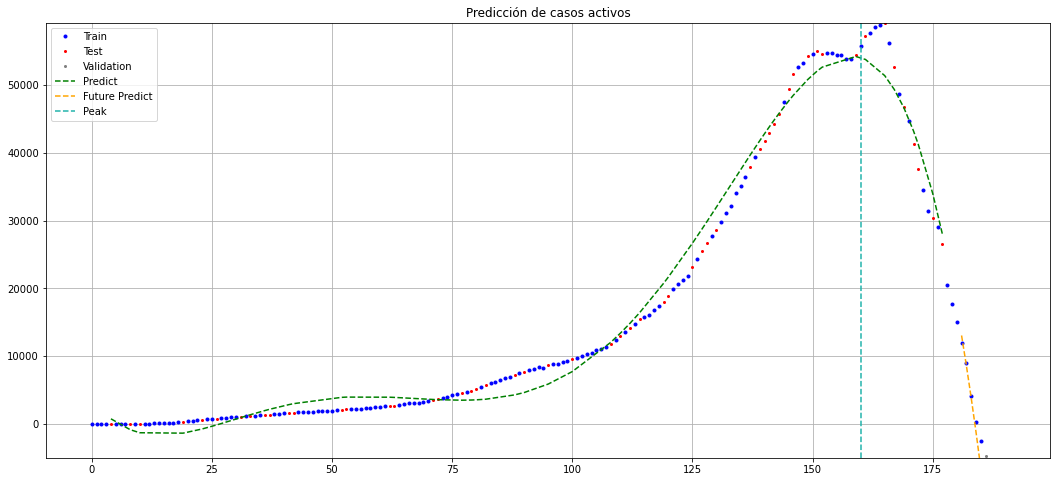

In [97]:
f = plt.figure(figsize=(18,8))
plt.title('Predicción de casos activos')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'--g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pcp_{}_activos'.format(name))

In [98]:
s = [y_pred_future.shape]
l = np.prod(s)


Se calculan las métricas de la regresión, en este caso se calculan las metricas completas sobre el conjunto de prueba, adicionalmente se computan las metricas solo desde el pico en adelante como indicar de las predicciones futuras.

In [99]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (5 days) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (5 days) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

---- Métricas ----
Total RMSE:		2250
Total MAE:		1788
Future (5 days) RMSE:	15112
Future (5 days) MAE:	13962


### Recuperados
Para la predicción de casos recuperados se usó una Regressión Lasso con caracteristicas Polinomiales de grado 4; previamente se estandarizaron los datos, y se entrenaron con un conjunto del 70% de los datos; estos datos se toman aleatoriamente, pero al graficarlos se orden en secuencia.

In [100]:
totalDays = len(df['dias'].values)
X = df['dias'].values[0:totalDays-5].reshape(-1,1) #Variable independiente.
y = df['acumulado_recuperados'].values[0:totalDays-5].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df['dias'].values[totalDays-5:].reshape(-1,1)
y_v = df['acumulado_recuperados'].values[totalDays-5:].reshape(-1,1)
#Se obtiene el 70% para entrenamiento y 30% para pruebas.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
#Se crea un pipeline con el escalado, las caracteristicas polinomiales y la regresión lasso
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=4),Lasso(random_state=123))
#Se realiza el entrenamiento.
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('lasso', Lasso(random_state=123))])

Se realizan las predicciones sobre el dataset de pruebas, adicionalmente se establece el pico en el día 175, por lo cual para fines de prueba se realizan predicciones desde dicho día, hasta el día 200 de la pandemia, para probar la predicción futura de los modelos a corto plazo.

In [101]:
#Obtener predicciones para los datos de prueba.
y_pred = pipe.predict(X_test)
#Predicciones futuras.
x_pred_future = np.arange(totalDays-10,totalDays,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

In [102]:
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

Se grafican los datos.

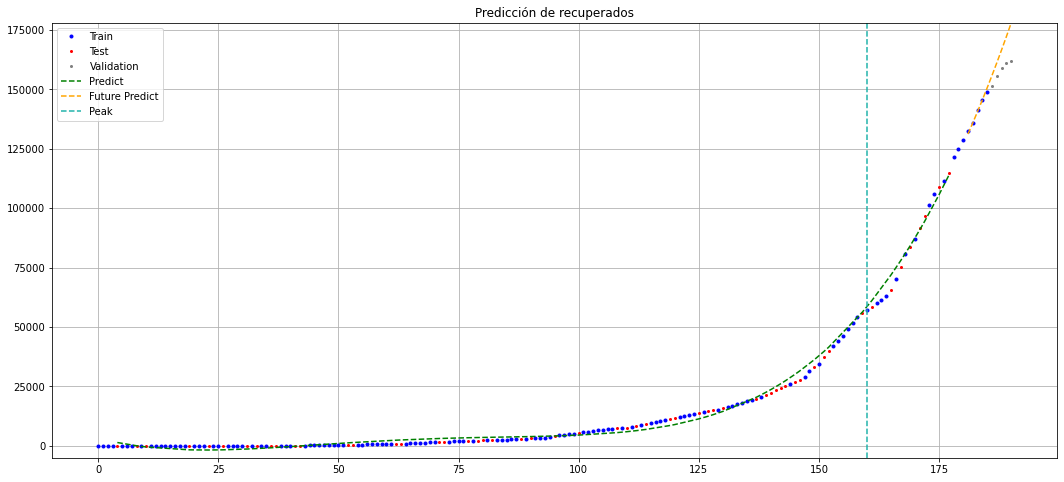

In [103]:
f = plt.figure(figsize=(18,8))
plt.title('Predicción de recuperados')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'--g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pcp_{}_recuperados'.format(name))

Se calculan las métricas de la regresión, en este caso se calculan las metricas completas sobre el conjunto de prueba, adicionalmente se computan las metricas solo desde el pico en adelante como indicar de las predicciones futuras.

In [104]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (5 days) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (5 days) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))


---- Métricas ----
Total RMSE:		1936
Total MAE:		1613
Future (5 days) RMSE:	9913
Future (5 days) MAE:	8960


### Muertes
Para la predicción de las muertes se usó una Regressión Lasso con caracteristicas Polinomiales de grado 6; previamente se estandarizaron los datos, y se entrenaron con un conjunto del 70% de los datos; estos datos se toman aleatoriamente, pero al graficarlos se orden en secuencia.

In [105]:
totalDays = len(df['dias'].values)
X = df['dias'].values[0:totalDays-5].reshape(-1,1) #Variable independiente.
y = df['acumulado_muertos'].values[0:totalDays-5].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df['dias'].values[totalDays-5:].reshape(-1,1)
y_v = df['acumulado_muertos'].values[totalDays-5:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=6),Lasso(random_state=123,max_iter=10000))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('lasso', Lasso(max_iter=10000, random_state=123))])

In [106]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(totalDays-10,totalDays,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

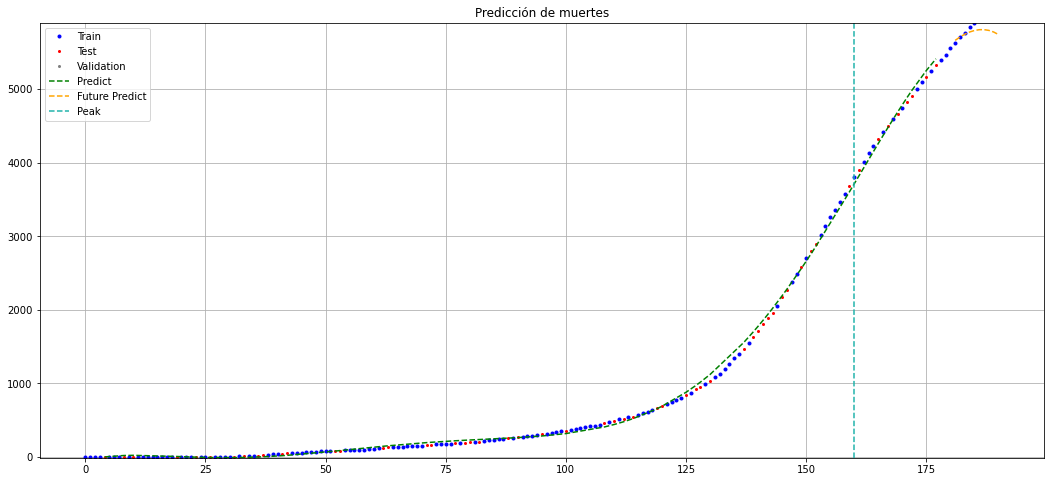

In [107]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción de muertes')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'--g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-10,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-10,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pcp_{}_muertes'.format(name))

In [108]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (5 days) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (5 days) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

---- Métricas ----
Total RMSE:		43
Total MAE:		36
Future (5 days) RMSE:	299
Future (5 days) MAE:	281


### Infectados
Para la predicción de los infectados se usó una Regressión Lasso con caracteristicas Polinomiales de grado 4; previamente se estandarizaron los datos, y se entrenaron con un conjunto del 70% de los datos; estos datos se toman aleatoriamente, pero al graficarlos se orden en secuencia.

In [109]:
totalDays = len(df['dias'].values)
X = df['dias'].values[0:totalDays-5].reshape(-1,1) #Variable independiente.
y = df['acumulado_infectados'].values[0:totalDays-5].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df['dias'].values[totalDays-5:].reshape(-1,1)
y_v = df['acumulado_infectados'].values[totalDays-5:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(random_state=123))])

In [110]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(totalDays-10,totalDays,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

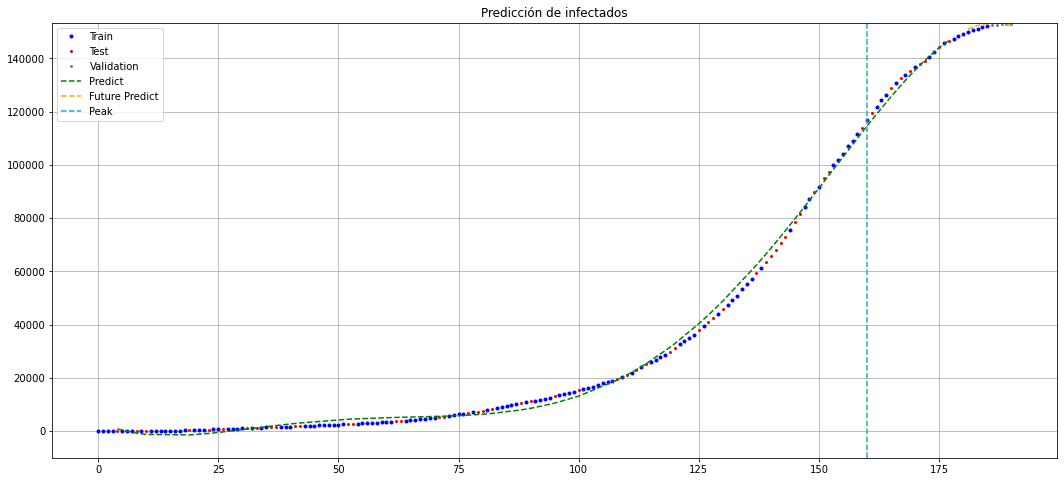

In [111]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción de infectados')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'--g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-10000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-10000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pcp_{}_infectados'.format(name))

In [112]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (5 days) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (5 days) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

---- Métricas ----
Total RMSE:		1782
Total MAE:		1489
Future (5 days) RMSE:	557
Future (5 days) MAE:	483


## Modelo Mediano Plazo
Para los modelos de mediano plazo, se sigue la misma dinámica que en corto plazo, pero se trabaja con un conjunto de datos que se preprocesó para que tenga los datos acumulados semanalmente, esto permite obtener las predicciones de Infectados, recuperados y muertos por semana.

In [113]:
urlDataset_w = 'Datos/data_weekly_{}.pickle'.format(name)
df_w = pd.read_pickle(urlDataset_w)
df_w.tail(20)

,infectados,recuperados,muertos,acumulado_infectados,acumulado_recuperados,acumulado_muertos,activos
semana,,,,,,,
8,764.0,308.0,28.0,3649.0,889.0,123.0,2637.0
9,1198.0,556.0,31.0,4847.0,1445.0,154.0,3248.0
10,1714.0,574.0,30.0,6561.0,2019.0,184.0,4358.0
11,2235.0,485.0,33.0,8796.0,2504.0,217.0,6075.0
12,2378.0,722.0,51.0,11174.0,3226.0,268.0,7680.0
13,2786.0,1542.0,56.0,13960.0,4768.0,324.0,8868.0
14,3458.0,1751.0,82.0,17418.0,6519.0,406.0,10493.0
15,4528.0,1415.0,107.0,21946.0,7934.0,513.0,13499.0
16,6778.0,2764.0,129.0,28724.0,10698.0,642.0,17384.0


### Activos

In [114]:
totalW = len(df_w.index.values)
X = df_w.index.values[0:totalW-3].reshape(-1,1) #Variable independiente.
y = df_w['activos'].values[0:totalW-3].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df_w.index.values[totalW-3:].reshape(-1,1)
y_v = df_w['activos'].values[totalW-3:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(max_iter=10000,random_state=123))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(max_iter=10000, random_state=123))])

El pico de la pandemia se grafica en la semana 22.

In [126]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(0,totalW,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)
Xpeak = GetPeak((X_train,y_train))
Xpeak

[[ 0  4  3 24 12 16  9 14 20  0  1 10 19 17  6 23  2 13]]
[[0.000e+00 1.100e+01 1.000e+00 5.091e+03 2.680e+02 6.420e+02 1.540e+02
  4.060e+02 2.265e+03 0.000e+00 0.000e+00 1.840e+02 1.634e+03 8.380e+02
  7.300e+01 4.505e+03 0.000e+00 3.240e+02]]
5091.0


24

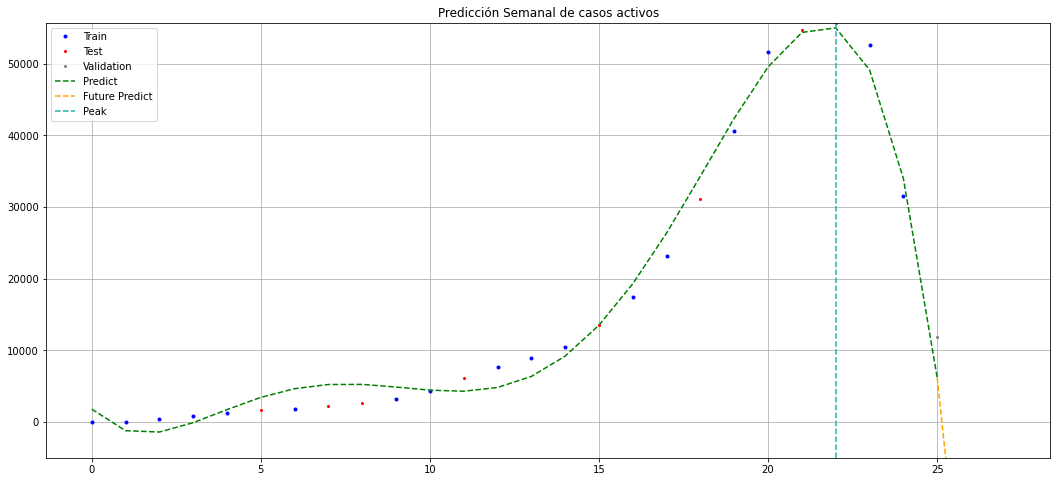

In [116]:
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de casos activos')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(x_pred_future[0:totalW-2],y_pred_future[0:totalW-2],'--g',label='Predict')
plt.plot(x_pred_future[totalW-3:],y_pred_future[totalW-3:],'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pmp_{}_activos'.format(name))

In [117]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (3 weeks) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (3 weeks) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

---- Métricas ----
Total RMSE:		2033
Total MAE:		1674
Future (3 weeks) RMSE:	53404
Future (3 weeks) MAE:	40054


### Recuperados

In [118]:
totalW = len(df_w.index.values)
X = df_w.index.values[0:totalW-3].reshape(-1,1) #Variable independiente.
y = df_w['acumulado_recuperados'].values[0:totalW-3].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df_w.index.values[totalW-3:].reshape(-1,1)
y_v = df_w['acumulado_recuperados'].values[totalW-3:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123,max_iter=10000))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('lasso', Lasso(max_iter=10000, random_state=123))])

In [119]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(0,totalW,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

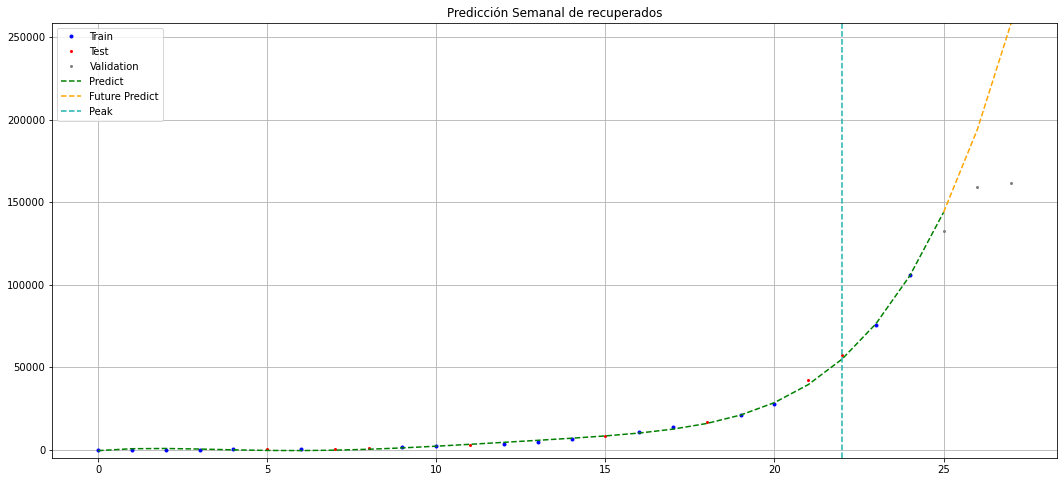

In [120]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de recuperados')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(x_pred_future[0:totalW-2],y_pred_future[0:totalW-2],'--g',label='Predict')
plt.plot(x_pred_future[totalW-3:],y_pred_future[totalW-3:],'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pmp_{}_recuperados'.format(name))

In [121]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (3 weeks) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (3 weeks) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

---- Métricas ----
Total RMSE:		1475
Total MAE:		1215
Future (3 weeks) RMSE:	59825
Future (3 weeks) MAE:	47761


### Muertos

In [122]:
totalW = len(df_w.index.values)
X = df_w.index.values[0:totalW-3].reshape(-1,1) #Variable independiente.
y = df_w['acumulado_muertos'].values[0:totalW-3].reshape(-1,1) #Variable dependiente.
#Datos de validación - nunca entran al modelo.
X_v = df_w.index.values[totalW-3:].reshape(-1,1)
y_v = df_w['acumulado_muertos'].values[totalW-3:].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=7),Lasso(random_state=123,max_iter=10000))
pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('lasso', Lasso(max_iter=10000, random_state=123))])

In [123]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(0,totalW,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))
Ymax = GetMax(y_train,y_test,y_pred,y_pred_future)

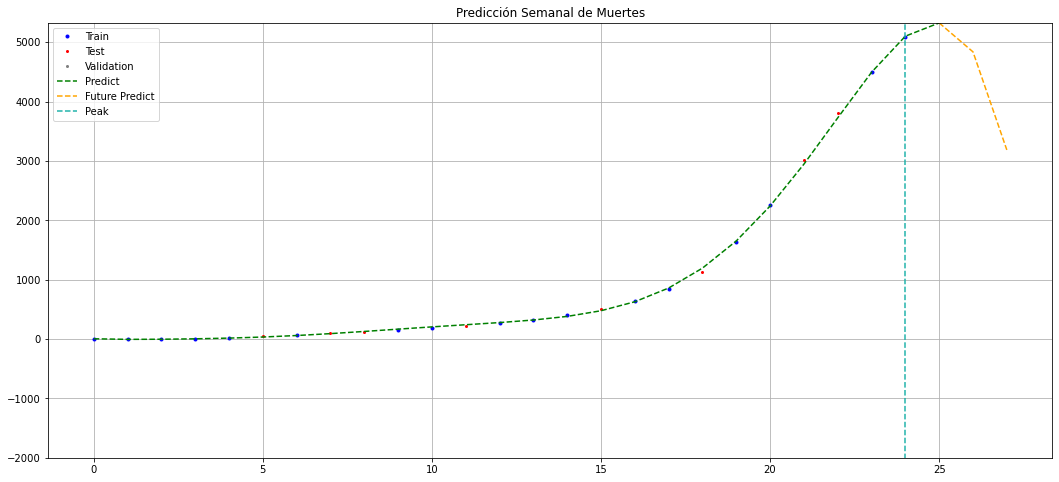

In [127]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de Muertes')
plt.grid()
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_v,y_v,'o',color='gray',markersize=2,label='Validation')
plt.plot(x_pred_future[0:totalW-2],y_pred_future[0:totalW-2],'--g',label='Predict')
plt.plot(x_pred_future[totalW-3:],y_pred_future[totalW-3:],'--',color='orange',label='Future Predict')
plt.plot([Xpeak,Xpeak],[-5000,Ymax],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-2000,Ymax)
plt.legend(loc='upper left');
plt.savefig('docs/images/pmp_{}_muertes'.format(name))

In [128]:
y_pred_val = pipe.predict(X_v)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('Future (3 weeks) RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_v, y_pred_val))))
print('Future (3 weeks) MAE:\t{:.0f}'.format(mean_absolute_error(y_v,y_pred_val)))

---- Métricas ----
Total RMSE:		44
Total MAE:		36
Future (3 weeks) RMSE:	1879
Future (3 weeks) MAE:	1510
